# Step-1: read the data sets in JSON format one by one

1. First find the  useful field that needs to be extracted, and create an extraction function.

2. It should be noted that because a single file is too large, it cannot be read at once (memory error), and can only be extracted separately and then merged.

3. Save the extracted JSON data as a PKL file for easy reading next time.

In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir(r'D:\dataset\2020-03-04 to 2020-03-10')

In [3]:
#create funcation for loads JSON files
def data_load(JSON):
   #read each line of the file, extract relevant data to analysis
    with open(JSON, "r") as f:
        for line in f:
            
            data = json.loads(line)

            #infor for this tweet
            tweet_id = data['id_str']

            tweet_lang = data['lang']

            tweet_time =data['created_at_src']

            #tweet_favorite_count = data['favorite_count']

            #infor from who tweet this tweet
            
            user_id = data['user']['id']

            user_location = data['user']['location']

            user_friends_count = data['user']['friends_count']

            user_favourites_count = data['user']['favourites_count']

            user_followers_count = data['user']['followers_count']

            #retweet = data['retweet_count']

            # Extraction of important information
            if 'extended_tweet' in data:
                text = data['extended_tweet']['full_text']
            else:
                text = data['text']

            try:
                url = data['entities']['urls'][0]['expanded_url']
                classification =data['entities']['classification']  
                sentiment = data['entities']['sentiment']
                swearword = data['entities']['swearword']
            except:
                url = None
                classification = None
                sentiment = None
                swearword = None    
            rows.append((tweet_id,tweet_lang,tweet_time,user_id,user_location,
                         user_friends_count,user_favourites_count,user_followers_count, 
                         text,url,classification,sentiment,swearword))

In [4]:
#Convert rows to DataFrame
def data_tofile(file):
    data_load(file)
    df= pd.DataFrame(data=rows, columns=['tweet_id','tweet_lang','tweet_time','user_id','user_location',
         'user_friends_count','user_favourites_count','user_followers_count', 
         'text','url','classification','sentiment','swearword'])

    #save as file
    df.to_pickle(file+'.pkl')

In [5]:
#Create a list of JSON files
JSON = ['2020-03-04.json','2020-03-05.json','2020-03-06.json','2020-03-07.json','2020-03-08.json','2020-03-09.json',
        '2020-03-10.json']

In [6]:
#Extract each JSON file using a loop
for i in JSON:
    rows=[]
    data_tofile(i)

# Step-2 Data preprocessing and cleaning

1. Combine PKL data into a DataFrame.

2. Pre-process the data and perform some necessary cleaning.

In [7]:
#Define the target file path
import glob
path = r'D:\dataset\2020-03-04 to 2020-03-10'
Files = glob.glob(path + "/*.pkl")

In [8]:
#Merge all PKL files
data_03mid = []

for files in Files:
    df = pd.read_pickle(files)
    data_03mid.append(df)

data = pd.concat(data_03mid, ignore_index=True,axis=0)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648295 entries, 0 to 1648294
Data columns (total 13 columns):
tweet_id                 1648295 non-null object
tweet_lang               1648295 non-null object
tweet_time               1648295 non-null object
user_id                  1648295 non-null int64
user_location            1030850 non-null object
user_friends_count       1648295 non-null int64
user_favourites_count    1648295 non-null int64
user_followers_count     1648295 non-null int64
text                     1648295 non-null object
url                      373346 non-null object
classification           373346 non-null object
sentiment                373346 non-null object
swearword                373346 non-null object
dtypes: int64(4), object(9)
memory usage: 163.5+ MB


In [10]:
data.head(5)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,classification,sentiment,swearword
0,1235354332343816194,en,Wed Mar 04 23:59:59 +0000 2020,714272731,None,2283,46427,11313,RT @NYMag: In the world of Trumpian propaganda...,None,None,None,None
1,1235354333451083778,en,Wed Mar 04 23:59:59 +0000 2020,1684192897,jersey gurl,1106,55903,1383,RT @miskeencore: find a leg to stand on before...,None,None,None,None
2,1235354333711159297,en,Wed Mar 04 23:59:59 +0000 2020,525718064,None,2539,21338,1754,Ron Johnson's Russian PROPAGANDA! Cult Johnson...,None,None,None,None
3,1235354334042435584,en,Wed Mar 04 23:59:59 +0000 2020,830123821,None,27,7506,205,More cancer propaganda YET AGAIN,None,None,None,None
4,1235354333383966720,pt,Wed Mar 04 23:59:59 +0000 2020,414733389,None,84,3032,20,"RT @TheInterceptBr: Direta ou indiretamente, t...",None,None,None,None


In [11]:
data.tweet_lang.value_counts()

en     1352513
pt      120375
es       65450
th       17868
it       12974
de       12768
fr       11912
in        8960
tl        7793
tr        6526
el        4877
nl        4494
pl        3496
hi        3130
ja        2825
und       2268
ca        2072
sv        1807
et        1210
lt         484
zh         436
eu         422
ur         369
cs         369
da         348
ta         337
ro         334
ht         294
no         264
sl         251
fi         215
ar         174
ru         150
lv         146
ko         132
fa          50
cy          32
vi          30
mr          30
ml          26
hu          23
iw          18
sr          12
bg           9
ne           4
te           4
gu           3
si           2
kn           2
am           2
bn           2
is           1
uk           1
hy           1
Name: tweet_lang, dtype: int64

In [12]:
#We are only focusing on data about English
data = data[data.tweet_lang == 'en']

In [13]:
data.user_id.value_counts()

886721547481874432     604
701867849707601921     520
840496870875045889     377
1016740773625286657    258
939209002357067778     245
                      ... 
14247236                 1
282721623                1
1210969890405765121      1
467250525                1
140517380                1
Name: user_id, Length: 638222, dtype: int64

In [14]:
data['tweet_time']

0          Wed Mar 04 23:59:59 +0000 2020
1          Wed Mar 04 23:59:59 +0000 2020
2          Wed Mar 04 23:59:59 +0000 2020
3          Wed Mar 04 23:59:59 +0000 2020
6          Wed Mar 04 23:59:59 +0000 2020
                        ...              
1648290    Tue Mar 10 00:00:00 +0000 2020
1648291    Tue Mar 10 00:00:00 +0000 2020
1648292    Tue Mar 10 00:00:00 +0000 2020
1648293    Tue Mar 10 00:00:00 +0000 2020
1648294    Tue Mar 10 00:00:00 +0000 2020
Name: tweet_time, Length: 1352513, dtype: object

In [15]:
#Replace the unused data in the time column
data.tweet_time = data.tweet_time.apply(lambda x : x.replace('+0000',''))

In [16]:
data.user_location.value_counts()

United States                     40135
USA                               14474
California, USA                   11173
India                             10977
Texas, USA                         9854
                                  ...  
Lvwndvle x CA                         1
https://mastodon.social/users/        1
Street of Fraud/Unofficial            1
244 Days to Election GOTV BLUE        1
Coming From Hell\n                    1
Name: user_location, Length: 138074, dtype: int64

In [17]:
data.url.value_counts()

https://www.politicususa.com/2020/03/05/democrats-will-go-after-trump-kids-crimes-if-he-pushes-ukraine-conspiracy.html            6202
https://twitter.com/bennyjohnson/status/1237155509121298432                                                                       3507
https://go.shr.lc/3cefw5L                                                                                                         2506
https://www.thedailybeast.com/dems-pounce-after-president-trump-says-in-fox-news-town-hall-that-he-intends-to-cut-entitlements    2326
https://www.thedailybeast.com/conspiracy-theorist-alex-jones-arrested-on-dwi-charge                                               1484
                                                                                                                                  ... 
https://twitter.com/i/web/status/1236119670408671232                                                                                 1
https://twitter.com/i/web/status/1236387835248357376   

In [18]:
data.swearword.value_counts()

[]                                                                             361240
[{'start': 29, 'end': 33, 'id': 'SWEAR:0000109', 'match_text': 'Damn'}]            76
[{'start': 24, 'end': 32, 'id': 'SWEAR:0000048', 'match_text': 'bullshit'}]        51
[{'start': 113, 'end': 115, 'id': 'SWEAR:0000201', 'match_text': 'ho'}]            50
[{'start': 111, 'end': 115, 'id': 'SWEAR:0000280', 'match_text': 'shit'}]          43
                                                                                ...  
[{'start': 50, 'end': 56, 'id': 'SWEAR:0000251', 'match_text': 'pissed'}]           1
[{'start': 106, 'end': 110, 'id': 'SWEAR:0000002', 'match_text': 'arse'}]           1
[{'start': 29, 'end': 34, 'id': 'SWEAR:0000037', 'match_text': 'bitch'}]            1
[{'start': 71, 'end': 79, 'id': 'SWEAR:0000003', 'match_text': 'arsehole'}]         1
[{'start': 78, 'end': 82, 'id': 'SWEAR:0000343', 'match_text': 'DUMB'}]             1
Name: swearword, Length: 4885, dtype: int64

In [19]:
#The dictionary expands to the column of dataframe
df_sentiment_dict = data['sentiment'][data['sentiment'].isnull().values==False].apply(pd.Series)

In [20]:
df_sentiment_dict

,probabilities,score,scored_by
7,"{'Very positive': 0.022521590848546512, 'Posit...",1,StanfordNLP
8,"{'Very positive': 0.009906245490921206, 'Posit...",1,StanfordNLP
9,"{'Very positive': 0.010822524336196904, 'Posit...",1,StanfordNLP
16,"{'Very positive': 0.0115079072150423, 'Positiv...",1,StanfordNLP
17,"{'Very positive': 0.01793738075226856, 'Positi...",1,StanfordNLP
...,...,...,...
1648283,"{'Very positive': 0.01372602502342939, 'Positi...",1,StanfordNLP
1648286,"{'Very positive': 0.02080315844026405, 'Positi...",1,StanfordNLP
1648288,"{'Very positive': 0.013949538411959105, 'Posit...",1,StanfordNLP
1648289,"{'Very positive': 0.016114059783905815, 'Posit...",1,StanfordNLP


In [21]:
#The dictionary expands to the column of dataframe
df_probabilities = df_sentiment_dict['probabilities'].apply(pd.Series)

In [28]:
df_probabilities

,Very positive,Positive,Neutral,Very negative,Negative
7,0.022522,0.140030,0.409270,0.036360,0.391818
8,0.009906,0.009523,0.134263,0.284909,0.561399
9,0.010823,0.012661,0.120844,0.207347,0.648326
16,0.011508,0.012439,0.114453,0.282276,0.579324
17,0.017937,0.012114,0.102412,0.363750,0.503787
...,...,...,...,...,...
1648283,0.013726,0.090467,0.333428,0.101784,0.460595
1648286,0.020803,0.058861,0.198508,0.192819,0.529009
1648288,0.013950,0.025800,0.185286,0.127094,0.647871
1648289,0.016114,0.051341,0.258065,0.127842,0.546638


In [23]:
df_emotion = pd.concat([df_sentiment_dict['score'], df_probabilities], axis = 1)

In [29]:
df_emotion

,score,Very positive,Positive,Neutral,Very negative,Negative
7,1,0.022522,0.140030,0.409270,0.036360,0.391818
8,1,0.009906,0.009523,0.134263,0.284909,0.561399
9,1,0.010823,0.012661,0.120844,0.207347,0.648326
16,1,0.011508,0.012439,0.114453,0.282276,0.579324
17,1,0.017937,0.012114,0.102412,0.363750,0.503787
...,...,...,...,...,...,...
1648283,1,0.013726,0.090467,0.333428,0.101784,0.460595
1648286,1,0.020803,0.058861,0.198508,0.192819,0.529009
1648288,1,0.013950,0.025800,0.185286,0.127094,0.647871
1648289,1,0.016114,0.051341,0.258065,0.127842,0.546638


In [25]:
data = pd.concat([data, df_emotion], axis = 1)

In [26]:
data = data.drop(['sentiment'],axis=1)

In [30]:
data.sample(5)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,classification,swearword,score,Very positive,Positive,Neutral,Very negative,Negative
875031,1236130588676898823,en,Sat Mar 07 03:24:33 2020,4814083692,He/him (Tongva land),133,70531,250,RT @youngkeyk: he is fighting an uphill battle...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
865521,1236164196305448961,en,Sat Mar 07 05:38:05 2020,397102174,SURULERE LAGOS,338,1520,298,RT @ogundamisi: .@MobilePunch called out by @B...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
546475,1235966521882615811,en,Fri Mar 06 16:32:36 2020,1088963807463047168,"Boston, Msaeachubaets",276,27982,980,RT @youngkeyk: he is fighting an uphill battle...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
477419,1236060007503998990,en,Fri Mar 06 22:44:05 2020,993216305741291520,None,8689,212047,8464,RT @ourspacetweets: Our awesome president does...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1130083,1237157544428212224,en,Mon Mar 09 23:25:18 2020,280800861,None,1542,144205,930,RT @davidsirota: There's been a disinformation...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Extract the first element in classification's list
data.classification = data['classification'][data.classification.isnull().values==False].apply(lambda x: x[0])

In [32]:
data.classification

0                                                        NaN
1                                                        NaN
2                                                        NaN
3                                                        NaN
6                                                        NaN
                                 ...                        
1648290                                                  NaN
1648291                                                  NaN
1648292                                                  NaN
1648293    {'score': 1, 'id': 'anger_cascading_naive-baye...
1648294                                                  NaN
Name: classification, Length: 1352513, dtype: object

In [33]:
data.head(1)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,classification,swearword,score,Very positive,Positive,Neutral,Very negative,Negative
0,1235354332343816194,en,Wed Mar 04 23:59:59 2020,714272731,None,2283,46427,11313,RT @NYMag: In the world of Trumpian propaganda...,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#The dictionary expands to the column of dataframe
df_classification = data.classification[data['classification'].isnull().values==False].apply(pd.Series)

In [35]:
df_classification

,score,id,classification,scored_by
7,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
8,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
9,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
16,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
17,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
...,...,...,...,...
1648283,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
1648286,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
1648288,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
1648289,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50


In [36]:
data = pd.concat([data, df_classification], axis = 1).drop('classification', axis = 1)

In [38]:
data.head(5)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,swearword,score,Very positive,Positive,Neutral,Very negative,Negative,score,id,scored_by
0,1235354332343816194,en,Wed Mar 04 23:59:59 2020,714272731,None,2283,46427,11313,RT @NYMag: In the world of Trumpian propaganda...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1235354333451083778,en,Wed Mar 04 23:59:59 2020,1684192897,jersey gurl,1106,55903,1383,RT @miskeencore: find a leg to stand on before...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1235354333711159297,en,Wed Mar 04 23:59:59 2020,525718064,None,2539,21338,1754,Ron Johnson's Russian PROPAGANDA! Cult Johnson...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1235354334042435584,en,Wed Mar 04 23:59:59 2020,830123821,None,27,7506,205,More cancer propaganda YET AGAIN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1235354332129878016,en,Wed Mar 04 23:59:59 2020,3421193831,United States,6770,44158,6677,RT @StormIsUponUs: More front-row entertainmen...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#Extract the first element in swearword's list
data_swearword = data['swearword'][data['swearword'].astype(bool)].apply(lambda x : x[0])

In [40]:
#The dictionary expands to the column of dataframe
data_swearword = data_swearword.apply(pd.Series)

In [41]:
data_swearword = data_swearword['match_text']

In [42]:
data_swearword

65           dumbass
173             dumb
460         bullshit
768            Bitch
806          Fucking
             ...    
1648028    shithouse
1648121        idiot
1648137          ass
1648189         cock
1648278         Fuck
Name: match_text, Length: 12106, dtype: object

In [43]:
data = pd.concat([data, data_swearword], axis = 1).drop('swearword', axis = 1)

In [44]:
data.head(5)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,score,Very positive,Positive,Neutral,Very negative,Negative,score,id,scored_by,match_text
0,1235354332343816194,en,Wed Mar 04 23:59:59 2020,714272731,None,2283,46427,11313,RT @NYMag: In the world of Trumpian propaganda...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1235354333451083778,en,Wed Mar 04 23:59:59 2020,1684192897,jersey gurl,1106,55903,1383,RT @miskeencore: find a leg to stand on before...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1235354333711159297,en,Wed Mar 04 23:59:59 2020,525718064,None,2539,21338,1754,Ron Johnson's Russian PROPAGANDA! Cult Johnson...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1235354334042435584,en,Wed Mar 04 23:59:59 2020,830123821,None,27,7506,205,More cancer propaganda YET AGAIN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1235354332129878016,en,Wed Mar 04 23:59:59 2020,3421193831,United States,6770,44158,6677,RT @StormIsUponUs: More front-row entertainmen...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#Adjust the index
data = data.reset_index(drop=True)

In [46]:
data.head()

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,score,Very positive,Positive,Neutral,Very negative,Negative,score,id,scored_by,match_text
0,1235354332343816194,en,Wed Mar 04 23:59:59 2020,714272731,None,2283,46427,11313,RT @NYMag: In the world of Trumpian propaganda...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1235354333451083778,en,Wed Mar 04 23:59:59 2020,1684192897,jersey gurl,1106,55903,1383,RT @miskeencore: find a leg to stand on before...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1235354333711159297,en,Wed Mar 04 23:59:59 2020,525718064,None,2539,21338,1754,Ron Johnson's Russian PROPAGANDA! Cult Johnson...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1235354334042435584,en,Wed Mar 04 23:59:59 2020,830123821,None,27,7506,205,More cancer propaganda YET AGAIN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1235354332129878016,en,Wed Mar 04 23:59:59 2020,3421193831,United States,6770,44158,6677,RT @StormIsUponUs: More front-row entertainmen...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Convert paths to save cleaned data as a file

In [47]:
os.chdir(r'D:\dataset\clear_data')

In [48]:
data.to_csv('data_03mid.csv')

# Step-3  Data Visualization of tweet information
1.Before more text mining, we will have a deeper understanding of tweet basic data.

2.Perform deeper cleaning for tweet data.

3.Extract more information through the visualization of tweet data.

In [49]:
#Read tweet data file
os.chdir(r'D:\dataset\clear_data')
data_03mid = pd.read_csv('data_03mid.csv')

In [50]:
data_03mid.head()

,Unnamed: 0,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,...,score,Very positive,Positive,Neutral,Very negative,Negative,score.1,id,scored_by,match_text
0,0,1235354332343816194,en,Wed Mar 04 23:59:59 2020,714272731,NaN,2283,46427,11313,RT @NYMag: In the world of Trumpian propaganda...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1235354333451083778,en,Wed Mar 04 23:59:59 2020,1684192897,jersey gurl,1106,55903,1383,RT @miskeencore: find a leg to stand on before...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1235354333711159297,en,Wed Mar 04 23:59:59 2020,525718064,NaN,2539,21338,1754,Ron Johnson's Russian PROPAGANDA! Cult Johnson...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1235354334042435584,en,Wed Mar 04 23:59:59 2020,830123821,NaN,27,7506,205,More cancer propaganda YET AGAIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1235354332129878016,en,Wed Mar 04 23:59:59 2020,3421193831,United States,6770,44158,6677,RT @StormIsUponUs: More front-row entertainmen...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#split of tweet_time column
tweet_day = data_03mid['tweet_time'].str.split(' ', n = 1,expand=True)

In [52]:
new_col = ['weekday','date']
tweet_day.columns = new_col
tweet_day.head()

,weekday,date
0,Wed,Mar 04 23:59:59 2020
1,Wed,Mar 04 23:59:59 2020
2,Wed,Mar 04 23:59:59 2020
3,Wed,Mar 04 23:59:59 2020
4,Wed,Mar 04 23:59:59 2020


In [53]:
#Convert str type data to datetime
tweet_day.date = pd.to_datetime(tweet_day.date)

In [54]:
tweet_day.head()

,weekday,date
0,Wed,2020-03-04 23:59:59
1,Wed,2020-03-04 23:59:59
2,Wed,2020-03-04 23:59:59
3,Wed,2020-03-04 23:59:59
4,Wed,2020-03-04 23:59:59


In [55]:
#Data merge processing
data_03mid = pd.concat([data_03mid,tweet_day],axis = 1).drop('tweet_time',axis = 1)

In [56]:
data_03mid.head()

,Unnamed: 0,tweet_id,tweet_lang,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,...,Positive,Neutral,Very negative,Negative,score.1,id,scored_by,match_text,weekday,date
0,0,1235354332343816194,en,714272731,NaN,2283,46427,11313,RT @NYMag: In the world of Trumpian propaganda...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-04 23:59:59
1,1,1235354333451083778,en,1684192897,jersey gurl,1106,55903,1383,RT @miskeencore: find a leg to stand on before...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-04 23:59:59
2,2,1235354333711159297,en,525718064,NaN,2539,21338,1754,Ron Johnson's Russian PROPAGANDA! Cult Johnson...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-04 23:59:59
3,3,1235354334042435584,en,830123821,NaN,27,7506,205,More cancer propaganda YET AGAIN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-04 23:59:59
4,4,1235354332129878016,en,3421193831,United States,6770,44158,6677,RT @StormIsUponUs: More front-row entertainmen...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-04 23:59:59


In [57]:
data_03mid.id.value_counts()

anger_cascading_naive-bayes_50-50:no     362022
anger_cascading_naive-bayes_50-50:yes     11324
Name: id, dtype: int64

In [58]:
data_03mid.scored_by.value_counts()

anger_cascading_naive-bayes_50-50    373346
Name: scored_by, dtype: int64

In [59]:
#rename 
data_03mid.rename(columns={'match_text':'swearword'},inplace=True)

In [60]:
data_03mid.swearword.value_counts()

shit        1647
bullshit    1057
fucking      886
idiot        756
dumb         629
            ... 
Knob           1
ucking         1
BOLLOX         1
guido          1
Kraut          1
Name: swearword, Length: 297, dtype: int64

In [61]:
data_03mid.head()

,Unnamed: 0,tweet_id,tweet_lang,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,...,Positive,Neutral,Very negative,Negative,score.1,id,scored_by,swearword,weekday,date
0,0,1235354332343816194,en,714272731,NaN,2283,46427,11313,RT @NYMag: In the world of Trumpian propaganda...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-04 23:59:59
1,1,1235354333451083778,en,1684192897,jersey gurl,1106,55903,1383,RT @miskeencore: find a leg to stand on before...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-04 23:59:59
2,2,1235354333711159297,en,525718064,NaN,2539,21338,1754,Ron Johnson's Russian PROPAGANDA! Cult Johnson...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-04 23:59:59
3,3,1235354334042435584,en,830123821,NaN,27,7506,205,More cancer propaganda YET AGAIN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-04 23:59:59
4,4,1235354332129878016,en,3421193831,United States,6770,44158,6677,RT @StormIsUponUs: More front-row entertainmen...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-03-04 23:59:59


In [62]:
#Delete useless data
data_03mid = data_03mid.drop([ 'score.1','id','scored_by'], axis=1)

In [63]:
#Adjust the order of columns in the dataframe
columns = ['tweet_id','tweet_lang','text','user_id','user_location',
           'user_friends_count','user_favourites_count','user_followers_count',
           'weekday','date','swearword','score',
           'Very positive','Positive','Neutral','Very negative',
           'Negative','url']
data_03mid = data_03mid[columns]
data_03mid.head()

,tweet_id,tweet_lang,text,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,weekday,date,swearword,score,Very positive,Positive,Neutral,Very negative,Negative,url
0,1235354332343816194,en,RT @NYMag: In the world of Trumpian propaganda...,714272731,NaN,2283,46427,11313,Wed,2020-03-04 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1235354333451083778,en,RT @miskeencore: find a leg to stand on before...,1684192897,jersey gurl,1106,55903,1383,Wed,2020-03-04 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1235354333711159297,en,Ron Johnson's Russian PROPAGANDA! Cult Johnson...,525718064,NaN,2539,21338,1754,Wed,2020-03-04 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1235354334042435584,en,More cancer propaganda YET AGAIN,830123821,NaN,27,7506,205,Wed,2020-03-04 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1235354332129878016,en,RT @StormIsUponUs: More front-row entertainmen...,3421193831,United States,6770,44158,6677,Wed,2020-03-04 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
data_03mid.to_csv('data_03mid.csv',index = False)

# Data Visualization

In [65]:
#Read tweet data file
data_03mid = pd.read_csv('data_03mid.csv')

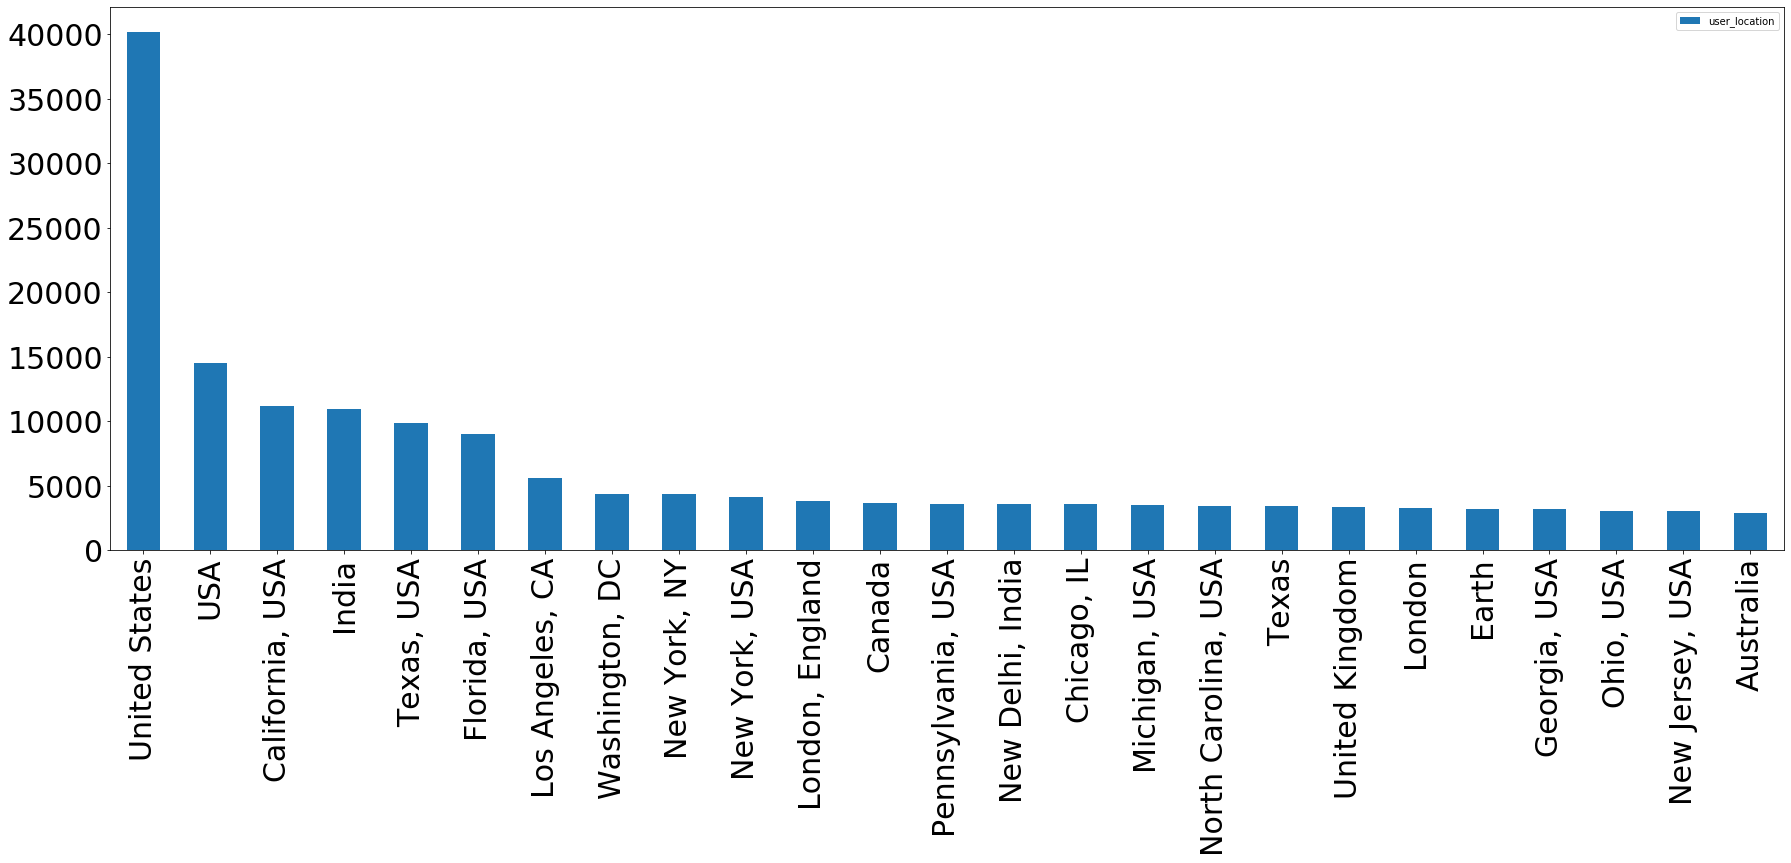

In [66]:
#Data visualization of user_location
#Observed that the majority of tweet publisher countries are US, India, and UK, but US accounts for a large part
%matplotlib inline
plt.figure(figsize=(30,10))
location_counts = data_03mid.user_location.value_counts()
location_counts[0:25].plot.bar(fontsize=30)
plt.legend()
plt.show()

In [67]:
data_03mid.head()

,tweet_id,tweet_lang,text,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,weekday,date,swearword,score,Very positive,Positive,Neutral,Very negative,Negative,url
0,1235354332343816194,en,RT @NYMag: In the world of Trumpian propaganda...,714272731,NaN,2283,46427,11313,Wed,2020-03-04 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1235354333451083778,en,RT @miskeencore: find a leg to stand on before...,1684192897,jersey gurl,1106,55903,1383,Wed,2020-03-04 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1235354333711159297,en,Ron Johnson's Russian PROPAGANDA! Cult Johnson...,525718064,NaN,2539,21338,1754,Wed,2020-03-04 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1235354334042435584,en,More cancer propaganda YET AGAIN,830123821,NaN,27,7506,205,Wed,2020-03-04 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1235354332129878016,en,RT @StormIsUponUs: More front-row entertainmen...,3421193831,United States,6770,44158,6677,Wed,2020-03-04 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


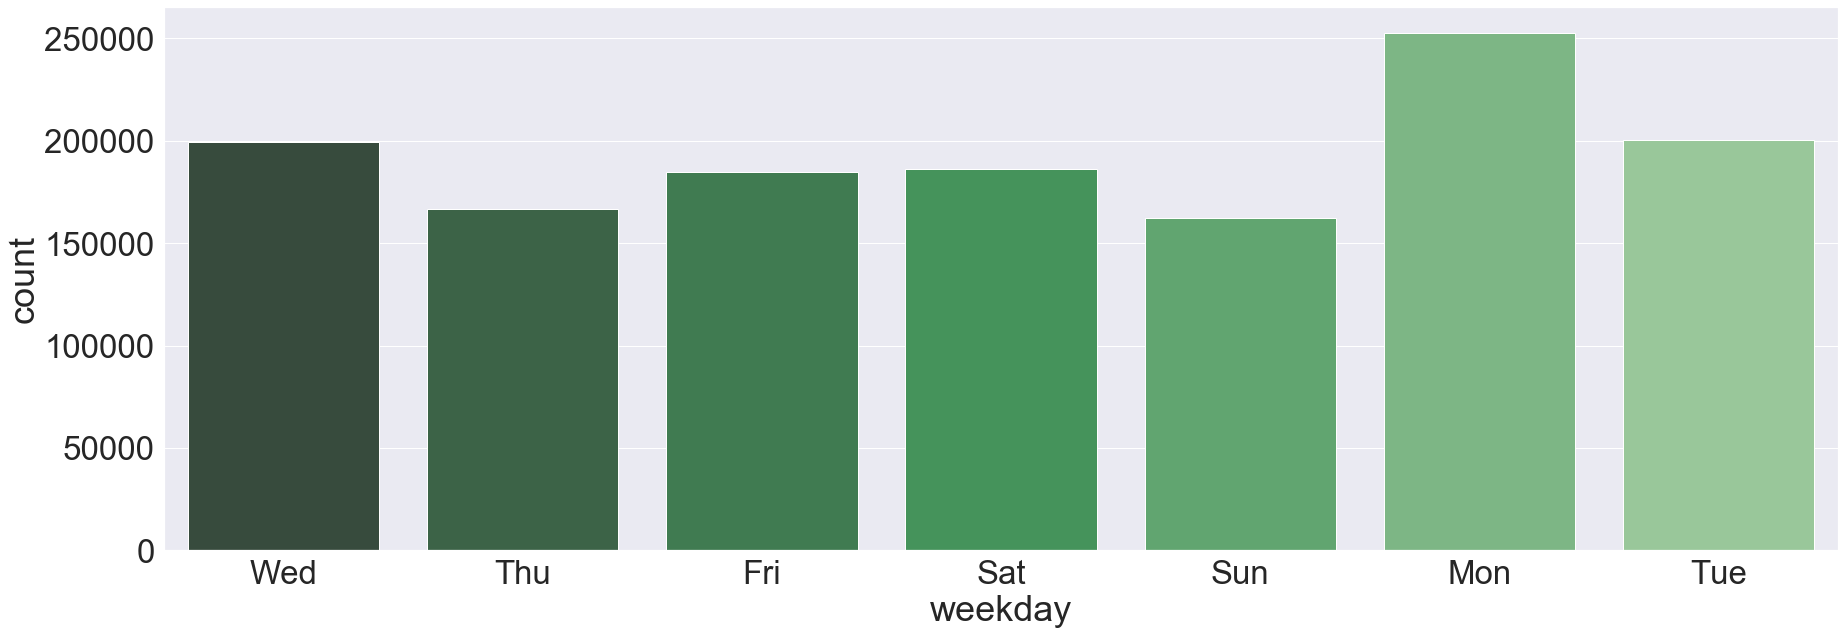

In [68]:
#Visualize the time published by tweet
#Wednesday with the most data is because there is a two-week Wednesday for the date of dataset, so there are more data samples.
#Post tweets on weekends a little more than weekdays
%matplotlib inline
plt.figure(figsize=(30,10))
# data_03_04.weekday.value_counts().plot.bar(fontsize=30)
# plt.show()
sns.set(font_scale=3)
sns.countplot(x='weekday', data=data_03mid, palette="Greens_d")
plt.show()

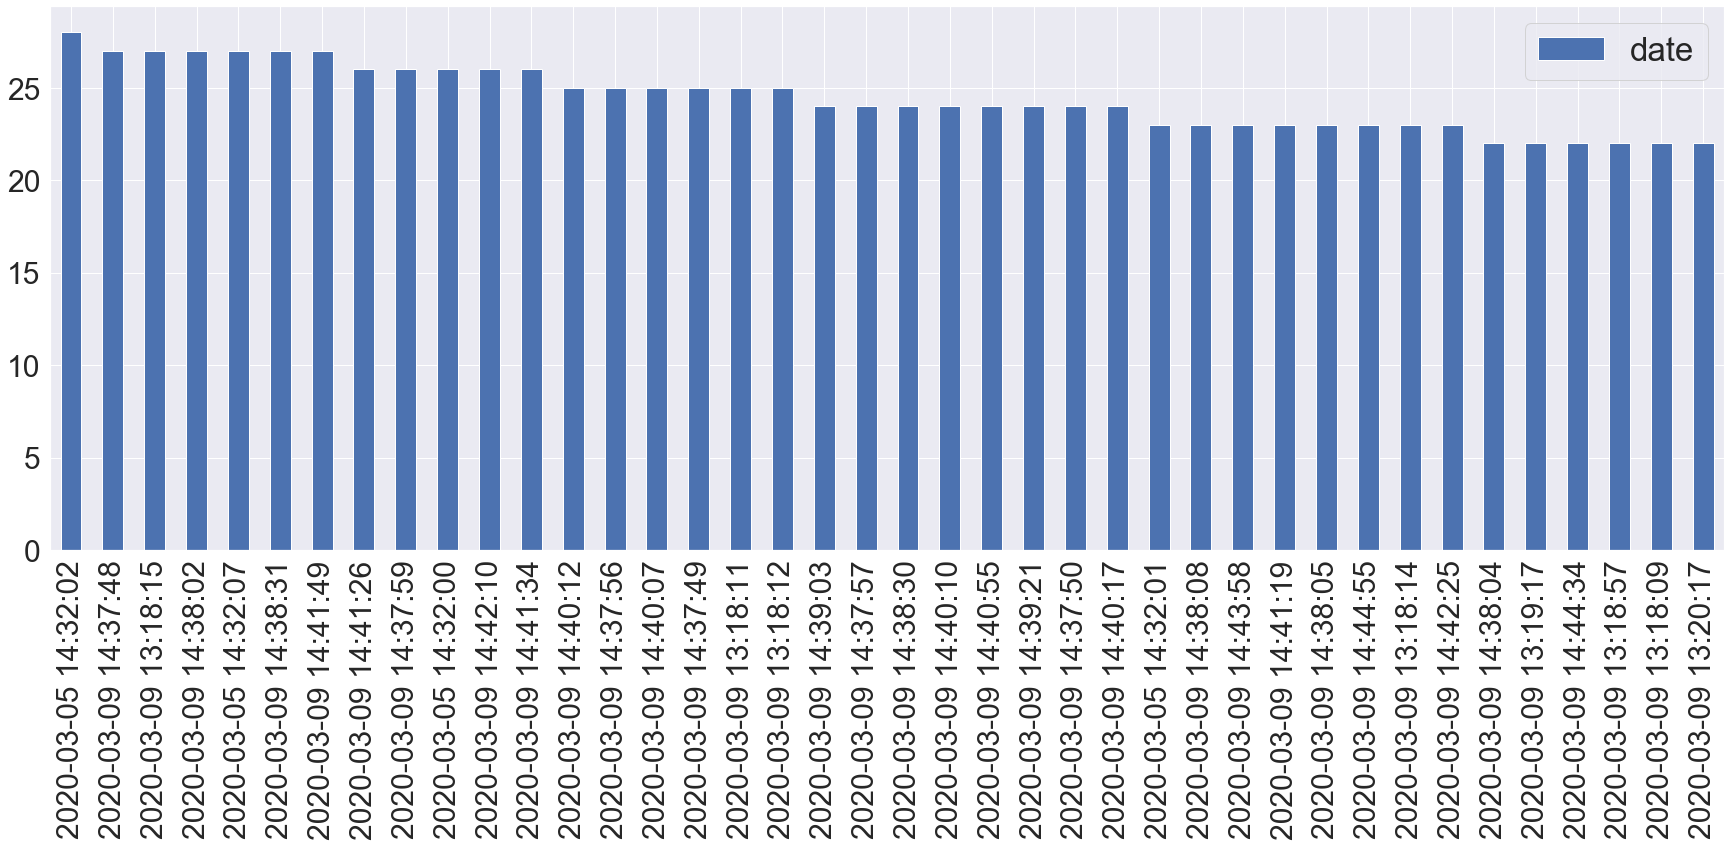

In [69]:
#Found that most tweets are released around 9pm
time_counts = data_03mid.date.value_counts()
plt.figure(figsize=(30,10))
time_counts[0:40].plot.bar(fontsize=30)
plt.legend()
plt.show()

In [70]:
#The number represents the emotional bias of the tweet, and the smaller the number, the more negative the emotion
data_03mid.score.value_counts()

1.0    321562
2.0     39465
3.0      8309
0.0      3915
4.0        95
Name: score, dtype: int64

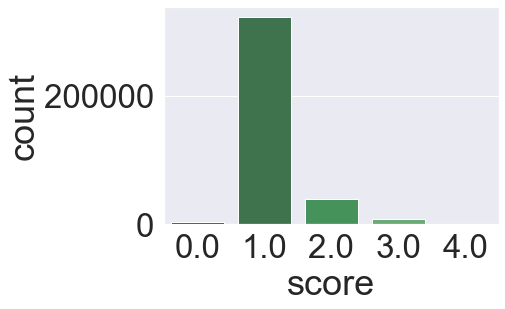

In [71]:
sns.countplot(x='score', data=data_03mid, palette="Greens_d")
plt.show()

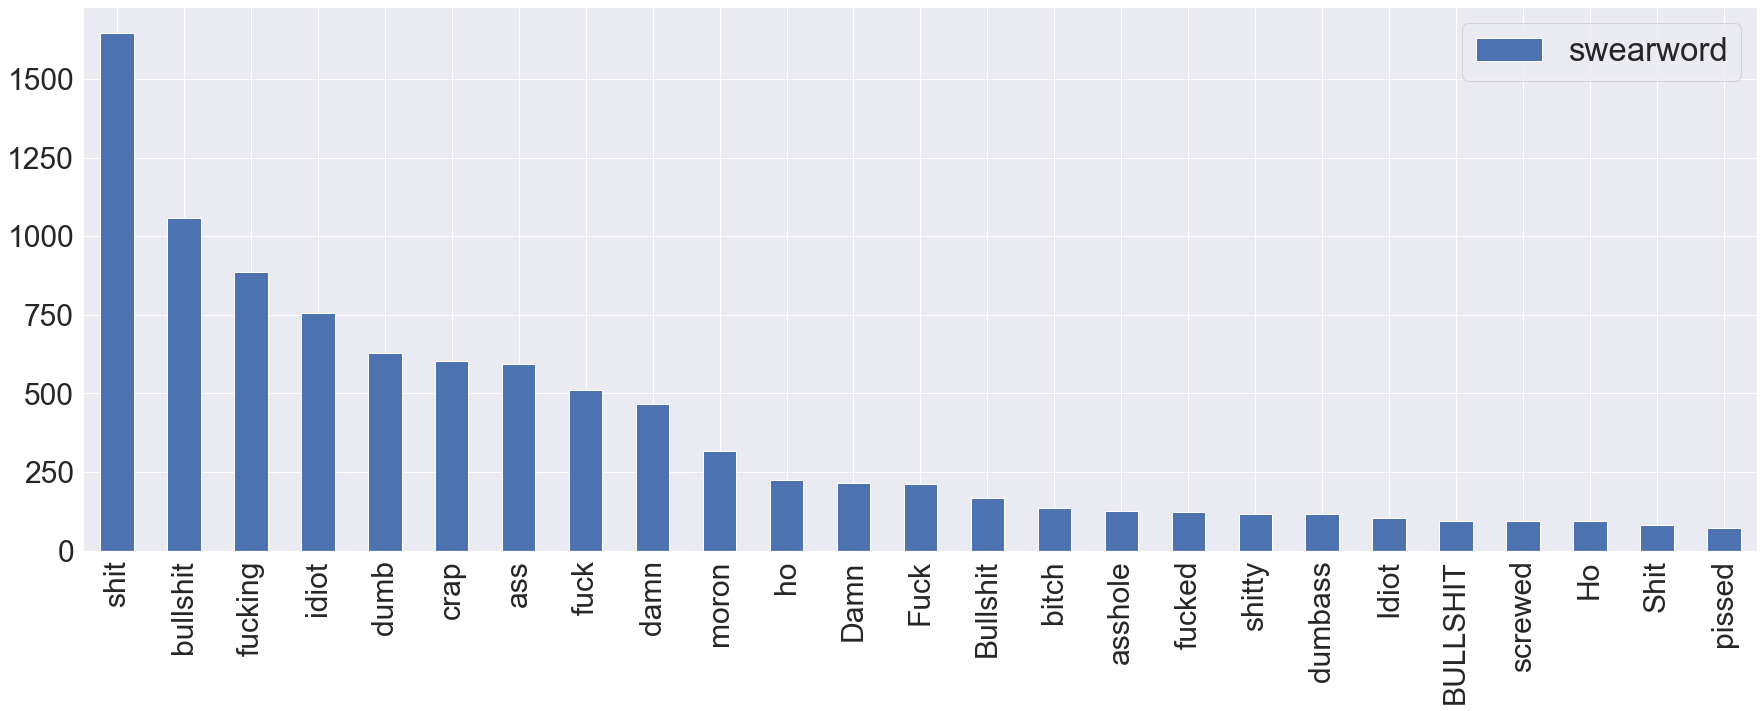

In [72]:
#Statistics about negative words in swearword
plt.figure(figsize=(30,10))
swearword_counts = data_03mid.swearword.value_counts()
swearword_counts[0:25].plot.bar(fontsize=30)
plt.legend()
plt.show()

In [73]:
#Sorting and data visualization of users with a relatively large number of tweets
users = data_03mid.user_id.value_counts()
users[0:20]

886721547481874432     604
701867849707601921     520
840496870875045889     377
1016740773625286657    258
939209002357067778     245
790547660583251968     235
4293960803             197
2286421713             191
1217818147660562432    183
553668770              176
263966773              173
985965515482025984     169
843823100567289856     168
948464246064427008     164
269029337              161
907857255613321217     152
726905629              151
1228651174162837507    150
826800720334749696     146
713899036030345216     145
Name: user_id, dtype: int64

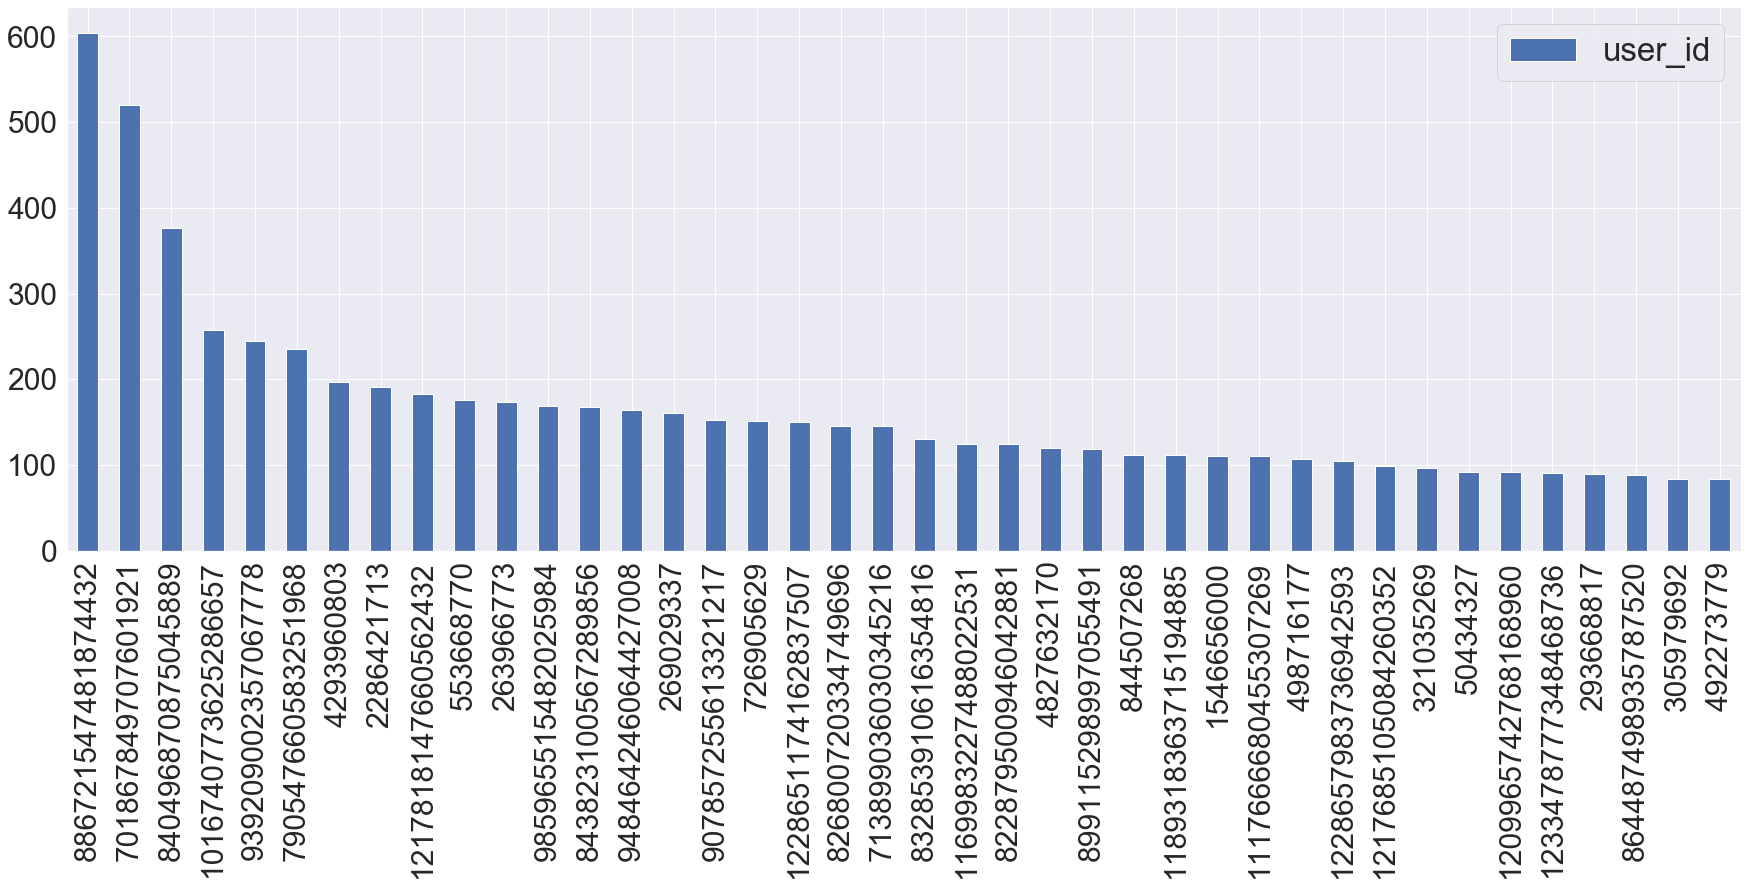

In [74]:
plt.figure(figsize=(30,10))
users[0:40].plot.bar(fontsize=30)
plt.legend()
plt.show()

In [75]:
#Collect data about usersinfo
userinfo = data_03mid[['user_id','user_location','user_friends_count','user_favourites_count','user_followers_count']].sort_values('user_followers_count',ascending = False)

In [76]:
userinfo[0:20]

,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count
1305639,25073877,"Washington, DC",47,7,73560907
1061596,25073877,"Washington, DC",47,7,73511089
1068204,25073877,"Washington, DC",47,7,73510739
1070323,25073877,"Washington, DC",47,7,73510556
793977,25073877,"Washington, DC",47,7,73490855
270578,25073877,"Washington, DC",47,7,73414758
730028,10228272,"San Bruno, CA",1052,2903,72391802
78526,25365536,,130,160,63726837
78983,25365536,,130,160,63726821
79458,25365536,,130,160,63726777


# Step-4 Separate storage and processing of text data
1.Save the data after  Pre-processing as a file

2.Text processing in pandas dataset

3.After processing, the old text data CSV file is overwritten（Avoid repeated operations when opening the file next time）

In [79]:
#read tweet data csv file
data_03mid = pd.read_csv('data_03mid.csv')
data_03mid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352513 entries, 0 to 1352512
Data columns (total 18 columns):
tweet_id                 1352513 non-null int64
tweet_lang               1352513 non-null object
text                     1352513 non-null object
user_id                  1352513 non-null int64
user_location            858974 non-null object
user_friends_count       1352513 non-null int64
user_favourites_count    1352513 non-null int64
user_followers_count     1352513 non-null int64
weekday                  1352513 non-null object
date                     1352513 non-null object
swearword                12106 non-null object
score                    373346 non-null float64
Very positive            373346 non-null float64
Positive                 373346 non-null float64
Neutral                  373346 non-null float64
Very negative            373346 non-null float64
Negative                 373346 non-null float64
url                      373346 non-null object
dtypes: float6

In [82]:
data_03mid.head(2)

,tweet_id,tweet_lang,text,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,weekday,date,swearword,score,Very positive,Positive,Neutral,Very negative,Negative,url
0,1235354332343816194,en,RT @NYMag: In the world of Trumpian propaganda...,714272731,NaN,2283,46427,11313,Wed,2020-03-04 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1235354333451083778,en,RT @miskeencore: find a leg to stand on before...,1684192897,jersey gurl,1106,55903,1383,Wed,2020-03-04 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
text_03mid = data_03mid[['tweet_id','text']]

In [84]:
text_03mid.head(2)

,tweet_id,text
0,1235354332343816194,RT @NYMag: In the world of Trumpian propaganda...
1,1235354333451083778,RT @miskeencore: find a leg to stand on before...


In [85]:
# Count characters
text_03mid['word_count'] = text_03mid['text'].apply(lambda x:len(x.split(' ')))
text_03mid[['text','word_count']].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,word_count
0,RT @NYMag: In the world of Trumpian propaganda...,23
1,RT @miskeencore: find a leg to stand on before...,16
2,Ron Johnson's Russian PROPAGANDA! Cult Johnson...,13
3,More cancer propaganda YET AGAIN,5
4,RT @StormIsUponUs: More front-row entertainmen...,20


In [86]:
# Statistical stop words
from nltk.corpus import stopwords
stop=stopwords.words('english')
text_03mid['stopwords']=text_03mid['text'].apply(lambda sen:len([x for x in sen.split() if x in stop]))
text_03mid[['text','stopwords']].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,text,stopwords
0,RT @NYMag: In the world of Trumpian propaganda...,5
1,RT @miskeencore: find a leg to stand on before...,6
2,Ron Johnson's Russian PROPAGANDA! Cult Johnson...,3
3,More cancer propaganda YET AGAIN,0
4,RT @StormIsUponUs: More front-row entertainmen...,6


In [87]:
text_03mid.head()

,tweet_id,text,word_count,stopwords
0,1235354332343816194,RT @NYMag: In the world of Trumpian propaganda...,23,5
1,1235354333451083778,RT @miskeencore: find a leg to stand on before...,16,6
2,1235354333711159297,Ron Johnson's Russian PROPAGANDA! Cult Johnson...,13,3
3,1235354334042435584,More cancer propaganda YET AGAIN,5,0
4,1235354332129878016,RT @StormIsUponUs: More front-row entertainmen...,20,6


In [88]:
#Save these textinfo statistics as a csv file
text_03mid.to_csv('text_03mid.csv',index=False)

# The processing of tweet text data includes：
1.the conversion of lowercase letters

2.deletion of @user and RT from each tweet

3.deletion of words with a length of less than 3

4.Delete punctuation

5.removal of stop words

6.The part of speech reduction 

7.word segmentation and Part-of-speech tagging

In [2]:
#Read the Tweet Text data again
os.chdir(r'D:\dataset\clear_data')
text_03mid = pd.read_csv('text_03mid.csv')
text_03mid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352513 entries, 0 to 1352512
Data columns (total 4 columns):
tweet_id      1352513 non-null int64
text          1352513 non-null object
word_count    1352513 non-null int64
stopwords     1352513 non-null int64
dtypes: int64(3), object(1)
memory usage: 41.3+ MB


In [3]:
len(text_03mid)

1352513

In [4]:
# Filter out some useless handles
import re
reg_map = {
    re.compile("rt [@0-9a-z_]{0,10}:"),
    re.compile("[a-zA-z]+://[^\s]*"),
    re.compile('http|htttps…'),
    re.compile('[a-z]*[:.]+\S+'),
    re.compile("@[0-9a-z]+"),
    re.compile("RT[\s]+"),
    re.compile("#"),
    re.compile('https?:\/\/\S+'),
}
def lower_and_remove_with_reg(text: str) -> str:
    text = text.lower()
    for v in reg_map:
        text = v.sub("", text)
    return text

In [5]:
# Filter out some useless handles
text_03mid['text']=text_03mid['text'].apply(lower_and_remove_with_reg)
text_03mid['text'].head()

0     in the world of trumpian propaganda, all news...
1     find a leg to stand on before parroting propa...
2    ron johnson's russian propaganda! cult johnson...
3                     more cancer propaganda yet again
4     more front-row entertainment from thestorm pr...
Name: text, dtype: object

In [6]:
text_03mid_http = text_03mid[text_03mid.text.str.contains(r'http')]
len(text_03mid_http)

0

In [7]:
# replaces periods with Spaces
text_03mid['text'] = text_03mid['text'].str.replace('[^a-zA-Z]', ' ') 
text_03mid['text'].head()

0     in the world of trumpian propaganda  all news...
1     find a leg to stand on before parroting propa...
2    ron johnson s russian propaganda  cult johnson...
3                     more cancer propaganda yet again
4     more front row entertainment from thestorm pr...
Name: text, dtype: object

In [8]:
#Delete the short term
text_03mid['text']=text_03mid['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
text_03mid['text'].head()

0    world trumpian propaganda news events fall int...
1    find stand before parroting propaganda interne...
2    johnson russian propaganda cult johnson spends...
3                         more cancer propaganda again
4    more front entertainment from thestorm product...
Name: text, dtype: object

In [9]:
# Remove stop words
from nltk.corpus import stopwords
stop=stopwords.words('english')
text_03mid['text']=text_03mid['text'].apply(lambda sen:" ".join(x for x in sen.split() if x not in stop))
text_03mid['text'].head()

0    world trumpian propaganda news events fall thr...
1       find stand parroting propaganda internet goofy
2    johnson russian propaganda cult johnson spends...
3                                    cancer propaganda
4    front entertainment thestorm productions look ...
Name: text, dtype: object

In [10]:
# #词干提取
# from nltk.stem import PorterStemmer
# st=PorterStemmer()
# text_03_04['text'] = text_03_04['text'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))
# text_03_04['text'].head()

In [11]:
#Part of speech reduction
from textblob import Word
text_03mid['text'] = text_03mid['text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
text_03mid['text'].head()

0    world trumpian propaganda news event fall thre...
1       find stand parroting propaganda internet goofy
2    johnson russian propaganda cult johnson spends...
3                                    cancer propaganda
4    front entertainment thestorm production look h...
Name: text, dtype: object

In [12]:
#Delete handle
#Participle
from nltk.tokenize import TweetTokenizer
from nltk import pos_tag
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
text_03mid['word']=text_03mid['text'].apply(tknzr.tokenize)
text_03mid['word'].head()

0    [world, trumpian, propaganda, news, event, fal...
1    [find, stand, parroting, propaganda, internet,...
2    [johnson, russian, propaganda, cult, johnson, ...
3                                 [cancer, propaganda]
4    [front, entertainment, thestorm, production, l...
Name: word, dtype: object

In [13]:
# Part-of-speech tagging
from nltk import pos_tag
from nltk import word_tokenize
def get_pos(text):
    token = word_tokenize(text)
    word = (pos_tag(token))
    return word

In [14]:
text_03mid['text_tag']=text_03mid['text'].apply(get_pos)
text_03mid.head()

,tweet_id,text,word_count,stopwords,word,text_tag
0,1235354332343816194,world trumpian propaganda news event fall thre...,23,5,"[world, trumpian, propaganda, news, event, fal...","[(world, NN), (trumpian, JJ), (propaganda, NN)..."
1,1235354333451083778,find stand parroting propaganda internet goofy,16,6,"[find, stand, parroting, propaganda, internet,...","[(find, NN), (stand, NN), (parroting, VBG), (p..."
2,1235354333711159297,johnson russian propaganda cult johnson spends...,13,3,"[johnson, russian, propaganda, cult, johnson, ...","[(johnson, NN), (russian, JJ), (propaganda, NN..."
3,1235354334042435584,cancer propaganda,5,0,"[cancer, propaganda]","[(cancer, NN), (propaganda, NN)]"
4,1235354332129878016,front entertainment thestorm production look h...,20,6,"[front, entertainment, thestorm, production, l...","[(front, JJ), (entertainment, NN), (thestorm, ..."


In [15]:
#save the text mining data as a new csv file
text_03mid.to_csv('text_03mid_mining.csv',index=False)

In [16]:
#Read the CSV file again for check 
text_03mid = pd.read_csv('text_03mid_mining.csv')
text_03mid.head()

,tweet_id,text,word_count,stopwords,word,text_tag
0,1235354332343816194,world trumpian propaganda news event fall thre...,23,5,"['world', 'trumpian', 'propaganda', 'news', 'e...","[('world', 'NN'), ('trumpian', 'JJ'), ('propag..."
1,1235354333451083778,find stand parroting propaganda internet goofy,16,6,"['find', 'stand', 'parroting', 'propaganda', '...","[('find', 'NN'), ('stand', 'NN'), ('parroting'..."
2,1235354333711159297,johnson russian propaganda cult johnson spends...,13,3,"['johnson', 'russian', 'propaganda', 'cult', '...","[('johnson', 'NN'), ('russian', 'JJ'), ('propa..."
3,1235354334042435584,cancer propaganda,5,0,"['cancer', 'propaganda']","[('cancer', 'NN'), ('propaganda', 'NN')]"
4,1235354332129878016,front entertainment thestorm production look h...,20,6,"['front', 'entertainment', 'thestorm', 'produc...","[('front', 'JJ'), ('entertainment', 'NN'), ('t..."
